In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yy4yNFaODSlGo8Xe9QvI")
project = rf.workspace("my-space-xiszl").project("food-a2sl5")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [16]:
from ultralytics import YOLO

# Load the YOLOv8 model (replace 'path/to/your_model.pt' with your model path if custom)
model = YOLO("yolov8n.pt")  # or use your custom model, e.g., "best.pt"


100%|██████████| 6.23M/6.23M [00:00<00:00, 41.1MB/s]
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [17]:
# Replace with the path to your test image
image_path = "/content/download (5).jpg"

# Perform prediction
results = model.predict(source=image_path, save=True, conf=0.5)  # Set confidence threshold as needed



image 1/1 /content/download (5).jpg: 640x448 1 cake, 520.7ms
Speed: 3.4ms preprocess, 520.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


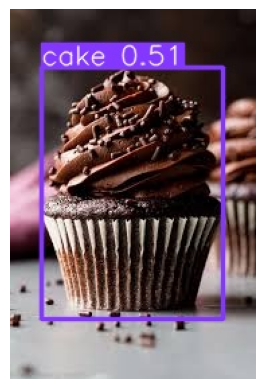

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the prediction image
output_image_path = "runs/detect/predict/download (5).jpg"  # Adjust the path if needed
output_image = Image.open(output_image_path)
plt.imshow(output_image)
plt.axis("off")
plt.show()
